In [1]:
from IPython.display import SVG

# The starting point

In this blog post and the following one, we will relate our experience on learning image classification. We took a kaggle competition as a trial project to help us acquire an experience in real world data issues without too much hassle on cleaning and getting the data. The objective of this competition is to contribute to fisheries monitoring by finding the best algorithm classifying into seven species pictures catched from fishing boats. For more details about the rules, please refer to [kaggle website](https://www.kaggle.com/c/the-nature-conservancy-fisheries-monitoring).

We are two freshly recruited data scientists with know hows about : coding, statistics and the constrains of real life data project. Both of us have an affinity with unix environments, experience in python programming language and bash scripting for automation purposes. Another common characteristic is that we both have a PhD in quantitative disciple. During this experience, we carried out our own research project with autonomy and perseverance in order to obtain original results and experience with long term project management.

On our definition of data scientist. Data scientist can have rather broad definitions. In our view it is someone who can handle a data oriented project in its entirety. It should comprise the overlapping of three distinct domains: the skills of a statistician who knows how to model and summarize datasets; the skills of a computer scientist who can design and use algorithms to efficiently store, process, and visualize this data; and the scientific perspective to ask the right questions and to put their answers in context. Most common tasks of a data scientist include project conception, tidying and exploring raw data, develop meaningful analysis, extract knowledge and information and communication an interesting and informative story. (This includes but is not limited to : project conception, data exploration/prep, developping meaningful analysis, extract knowledge not only information...) 

A consequence of the competition [NDA](https://kaggle2.blob.core.windows.net/competitions/kaggle/5568/media/Competition%20Governing%20NDA%20110816.pdf), we can not share the pictures. The training dataset is divided in different categories with several annotated species with two extra classes : no fishes or other (whales, ...). The pictures are wide field shots from the several boats encompassing variations such as : day/night, multiplicity of fishes per picture, large fields of boat features,...

In the following sections and article you will find a summary of our discovery of image analysis and classification as close as possible to how we lived the experience.

# A naive approach

Among the first things we did was to follow approaches that were described for image classification. There are two main pipelines as show in the figure below: 

A traditional computer vision approach were the principal features of the images are extractited using algorithms like [Histogram of Oriented Gradients](http://www.learnopencv.com/histogram-of-oriented-gradients/), [Scale-Invariant Feature Transform](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html), [Speeded Up Robust Feature](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_surf_intro/py_surf_intro.html), etc. Then a machine learning algorithm is used to perform the classification. 

On the other hand, deep learning based algorithms bypass the feature extraction step completely. Deep learning has become so popular in the recent years because it achieved substantially better resutls on [ImageNet Large Scale Visual Recognition Challenge](http://www.image-net.org/challenges/LSVRC/). In 2012 an algorithm based on deep learning win the competition with an 85% accuracy, the only deep learning based entry that was 11% better than the algorithm that won the second place. In 2013, all winning entries were based on deep learning and in 2015 multiple Convolutional Neural Network (CNN) based algorithms surpassed the human recognition rate of 95%. In addition the progress in terms of computational power, especifically for GPU, have enable to train neural networks on massive sets of data. 


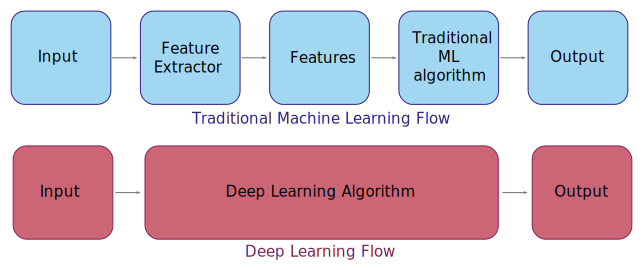

In [3]:
SVG(filename='images/diagram.svg')

Many described deep learning as the way to go, but having no prior experience with image classification we also wanted to understand what and how to extract features from images. In this respect we tested the bag of features approach described in this [ebook](https://www.packtpub.com/big-data-and-business-intelligence/building-machine-learning-systems-python), you can find a general description of the approach on [Wikipedia](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision) and the following figure reflects more specifically our approach. Briefly, the first step is to define the features to extract from the images, convert them into vectors and feed them into a classifier. We ended up as our best approach to extract two major vectors. The first is simply a value histogram of the picture and the second one used [SURF](http://mahotas.readthedocs.io/en/latest/surf.html) keypoint detector. Keypoints for every picture are first exctracted by SURF that generate a fixed sized monodimensional vector. The importance of redundant vectors is then assessed by clustering them using [K-Means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) in order to detect which element of the pictures are to be highlighted. The next step is then to count how many times per picture a common feature is present and build a vector accordingly. Finally, the vectors are concatenated and fed to a classifier.

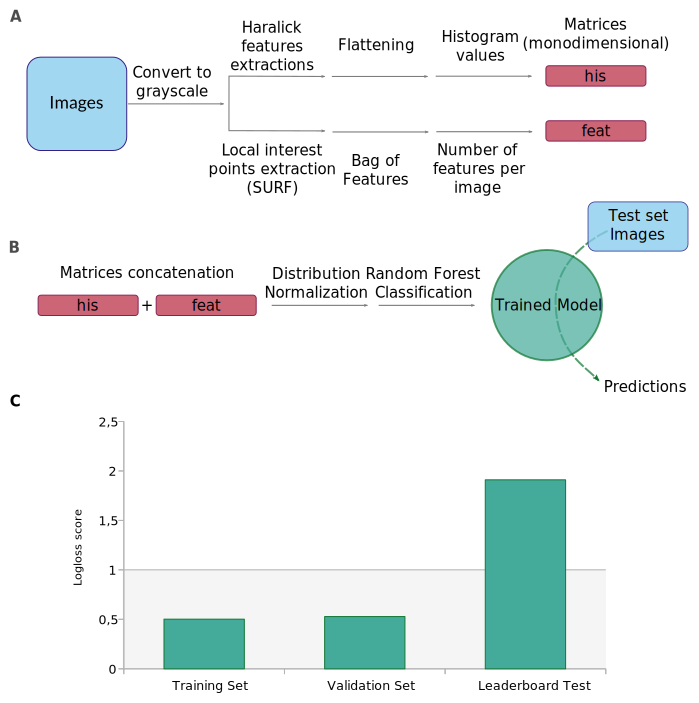

In [2]:
SVG(filename='images/bag_of_features.svg')

The results were at first very encouraging, we trained on randomly split images and as you can see in the previous figure, section C, the logloss score was not bad. We then realised the breadth of what we have to learn when we faced the results on the leader board. This huge shift in the score meant that we did not understand the dataset correctly and were likely overfitting the data thus we went on to design a more complete approach.

# Strategy

As a follow up, we started to really get to know the dataset, deeply. First of all, the pictures are taken from cameras, this means that some shots are actually successive images from one scene. We could also notice that we have day/night pictures, a large variety of conditions (fog/rain/...).

Even if approaches such as convnet are extracting features automatically, we started to think like old times botanists : what set of features enables you to visually, with our own words to discriminate between two species ? Do we even have a chance to distinguish them ?
Well.. yes to some extend. The sharks have fins with very caracteristic shapes, Yellow fish have their color (yes, yellow) and so on for all of them. Exception made of Albacore and Big eye tuna that have very little difference. The length of their side fins seems to vary (thank you [wikipedia](http://www.wikipedia.org)) but when we looked at the pictures we had, this was not something really visible.
This is why we decided to implement a pipeline where we detect the fish inside the image, then use this information to crop the pictures and finaly make the classification from those images.

An other observation that was made on the Kaggle forums was the importance of the boats. Indeed, in classical training, you randomly divide your pictures between training and validation sets. In this specific case, you often induce a clustering of images from the same boats (they are not so many) in either training or validation sets yielding to highly overfitting systems that poorly generalize. This is something we further took into consideration.

## Diagram

We decided to reduce the noise of the our pictures. 
We got inspired from [previous kaggle competitions](https://deepsense.io/deep-learning-right-whale-recognition-kaggle/) of similar objetive.
The main idea was to train a model to obtain the coordinates of the bounding box containing a fish. 
The approach is schematized in the figure below .
We decided to do this by training a CNN model inspired by the [deep learning courses of fast.io](https://github.com/fastai/courses/blob/master/deeplearning1/nbs/lesson7.ipynb).
The model was adapted to obtain additionaly a classification of the picture to know if it contains a fish or not. 
Depending if the model predicts a fish in the image, it is crop or not.
We are going to explain this model in more details during part 2 of this article. 

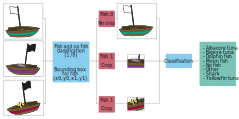

In [4]:
SVG(filename='images/schema.svg')

# Workflow

This project has been also the oportunity to improve our project manager skills oriented to data science. 
In order to structure our file location, we used [Cookiecutter](https://github.com/audreyr/cookiecutter). This tool offers a file structure for different kinds of projects, improving organization of code by defining an standard pattern, as you can find for other applications like for instance building a website in ruby. 
We used a project template from [Cookiecutter for data science](http://drivendata.github.io/cookiecutter-data-science/) to develop our analysis. This tool is intented to ease the development between data processing, analysis and reporting. The template contains  a defined folder structure (listed below). On this way, the raw data remains inmutable and the intermediate data remains separated in other folder. The scripts are organaized following the pourpose that they have. 

```
├── data
│   ├── external       <- Data from third party sources.
│   ├── interim        <- Intermediate data that has been transformed.
│   ├── processed      <- The final, canonical data sets for modeling.
│   └── raw            <- The original, immutable data dump.
│
├── docs               <- A default Sphinx project; see sphinx-doc.org for details
│
├── models             <- Trained and serialized models, model predictions, or model summaries
│
├── notebooks          <- Jupyter notebooks.
│
├── references         <- Data dictionaries, manuals, and all other explanatory materials.
│
├── reports            <- Generated analysis as HTML, PDF, LaTeX, etc.
│
├── requirements.txt   <- The requirements file for reproducing the analysis environment, e.g.
│                         generated with `pip freeze > requirements.txt`
│
└── src                <- Source code for use in this project.
    ├── data           <- Scripts to download or generate data
    ├── features       <- Scripts to turn raw data into features for modeling
    ├── models         <- Scripts to train models and then use trained models to make
    │   │                 predictions
    └── visualization  <- Scripts to create exploratory and results oriented visualizations
```


We used other tools like [git](https://git-scm.com/) to control the version evolution of our files. 
The python virtual environment tool help us to keep the trace of the package dependencies required in our scripts for our analysis. It also avoid conflicts with the global site-package directory. 
We implemented some python functions to keep the trace of the attributes of each photo beacuse it is an information that we need along most of our files in the processing and modeling pipeline. 
This was usefull for us because we defined a custom validation set with photos of the some boats that were different from the train set.
Inside this function we keep trace of information like the name of the file, the classification of the photo, wheter is and image of our validation set or not.

In [3]:
class ProjFolder(objdict):
    """
    A class to define project's subfolders for easy access.
    """
    def __init__(self):
        # level data
        self.datafolder = op.join(ROOTFOLDER, 'data')
        for subfol in ['external', 'interim', 'processed', 'raw']:
            setattr(self,
                    'data_' + subfol,
                    op.join(self.datafolder, subfol))

        # level data external
        for subfol in ['annos', 'rotate_crop']:
            setattr(self,
                    'data_external_' + subfol,
                    op.join(self.data_external, subfol))

        # level data interim
        for subfol in ['train', 'test']:
            setattr(self,
                    'data_interim_' + subfol,
                    op.join(self.data_interim, subfol))

        for subfol in ['crop', 'generated', 'rotatecrop', 'devcrop']:
            setattr(self,
                    'data_interim_train_' + subfol,
                    op.join(self.data_interim_train, subfol))

        for subfol in ['train', 'val']:
            setattr(self,
                    'data_interim_train_crop_' + subfol,
                    op.join(self.data_interim_train_crop, subfol))

        for subfol in ['train', 'val']:
            setattr(self,
                    'data_interim_train_rotatecrop_' + subfol,
                    op.join(self.data_interim_train_rotatecrop, subfol))

        for subfol in ['train', 'val', 'test']:
            setattr(self,
                    'data_interim_train_devcrop_' + subfol,
                    op.join(self.data_interim_train_devcrop, subfol))

        # level data raw
        for subfol in ['train', 'test']:
            setattr(self, 'data_raw_' + subfol,
                    op.join(self.data_raw, subfol))


class CustomSplit():
    """
    Custom split of the data to define boat dependant split
    """
    def __init__(self):
        self.f = ProjFolder()
        self.classes = ['ALB',
                        'BET',
                        'DOL',
                        'LAG',
                        'NoF',
                        'OTHER',
                        'SHARK',
                        'YFT']
        self.images = []
        self.X_train = []
        self.y_train = []
        self.X_train_id = []
        self.X_train_norm = []
        self.y_train_norm = []

* Package structure - > details about how to create a package

# Conclusion part 1

In this first section we learned a great deal of elements. The first thing we did was to get used to work with images and consider them as matrices. Next, we developed a first feeling of what is like to train a model and what kind of clues to look for to avoid overfitting. As a first team up, we also got acquainted with the tools required for efficient team communication and collaboration. fTO BE DEVELOPED ...

# Article 2

Intro to the subsections...

# A more complete bag of features approach

Like many, we noticed that whatever feature detection technique you use, many detection points are for the boat or more globally for the environment that we want to get rid of. In order to limit this issue, we tried to generate a mask to remove large elements such as pieces of boats that are present in the full sized images. The goal for the mask was to remove background elements from the image such as large elements of the boats that are rather squarish and have homogeneous colors and then perform keypoint detection using ORB (very similar results to SURF, that we finally used). We further fine-tuned the idea by adding some gaussian blur and color segmentation to smoothen the shapes as you can see below : 

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


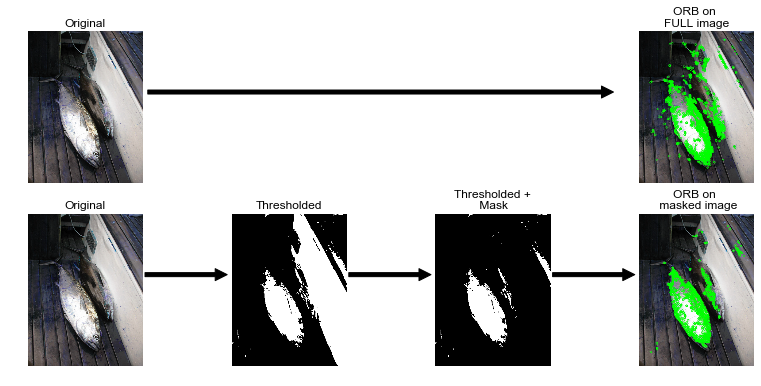

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

im = 'images/3537255216_d766eac288.jpg'
img = cv2.imread(im)

# Perform keypoint detection on full image
orb = cv2.ORB_create(nfeatures=3000)
kp, descs = orb.detectAndCompute(img, None)
blobs_img_full = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)

blur = cv2.GaussianBlur(img, (3, 3), 0)
Z = blur.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 16
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((blur.shape))
# Convert to grayscale and apply otsu.
gray = cv2.cvtColor(res2, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)

# Noise removal by contour detection of large elements
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
mask = np.zeros(thresh.shape, np.uint8)
mask2 = np.zeros(thresh.shape, np.bool)
# Remove large elements, typically boat structures 
for c in contours:
    # if the contour is not sufficiently large, ignore it
    # this parameter is highly dependant on the image size
    if cv2.contourArea(c) < 20000:
        continue
    cv2.drawContours(mask, [c], -1, (255, 255, 255), -1)
mask2[mask < 250] = True
masked = thresh * mask2
masked = cv2.cvtColor(masked, cv2.COLOR_GRAY2BGR)

# Perform keypoint detection on masked image
orb = cv2.ORB_create(nfeatures=3000)
kp, descs = orb.detectAndCompute(res2 * masked, None)
blobs_img = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)

# Plot shape of the mask and the detected keypoints
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 10}
mpl.rc('font', **font)
fig, ax = plt.subplots(2, 4, sharex=False, sharey=False)
fig.set_figwidth(14, forward=True)
fig.set_figheight(6, forward=True)


ax[0, 0].set_aspect(aspect='auto', adjustable='box-forced')
ax[0, 0].set_title('Original')
ax[0, 0].axis('off')
ax[0, 0].imshow(img)

ax[0, 3].set_aspect(aspect='auto', adjustable='box-forced')
ax[0, 3].set_title('ORB on \nFULL image')
ax[0, 3].axis('off')
ax[0, 3].annotate('', xy=(0, 200), xytext=(-1700, 200),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax[0, 3].imshow(blobs_img_full)

ax[0, 1].axis('off')
ax[0, 2].axis('off')

ax[1, 0].set_aspect(aspect='auto', adjustable='box-forced')
ax[1, 0].set_title('Original')
ax[1, 0].axis('off')
ax[1, 0].imshow(img)

ax[1, 1].set_aspect(aspect='auto', adjustable='box-forced')
ax[1, 1].set_title('Thresholded')
ax[1, 1].axis('off')
ax[1, 1].annotate('', xy=(0, 200), xytext=(-300, 200),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax[1, 1].imshow(thresh, cmap=plt.cm.gray)

ax[1, 2].set_aspect(aspect='auto', adjustable='box-forced')
ax[1, 2].set_title('Thresholded +\n Mask')
ax[1, 2].axis('off')
ax[1, 2].annotate('', xy=(0, 200), xytext=(-300, 200),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax[1, 2].imshow(masked, cmap=plt.cm.gray)

ax[1, 3].set_aspect(aspect='auto', adjustable='box-forced')
ax[1, 3].set_title('ORB on \n masked image')
ax[1, 3].axis('off')
ax[1, 3].annotate('', xy=(0, 200), xytext=(-300, 200),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax[1, 3].imshow(blobs_img)

plt.show()

As you can see on the images, it does enable us to remove regions for keypoint detection that surround the fishes, such a the floor or the elements in the top-middle region. This is just one example that is not in the dataset (see NDA), but on the images of the dataset, by playing with the number of colors and size of the elements we were actually able to remove quite a lot of non intersting features. At the same time, you can notice that some of the major elements are also lost such as the fins. They are extremely important in fish classification as their positions, proportions to each other and colors are key to fish species definition as previously discussed.

The Kernix Lab has been successful by using [XGBoost](https://xgboost.readthedocs.io/en/latest/) library for classifications problems, which is a popular gradient boosted machine. So we went on to replace random forest by an optimized xgboost classifier and here are the results we had at the end of the competition :

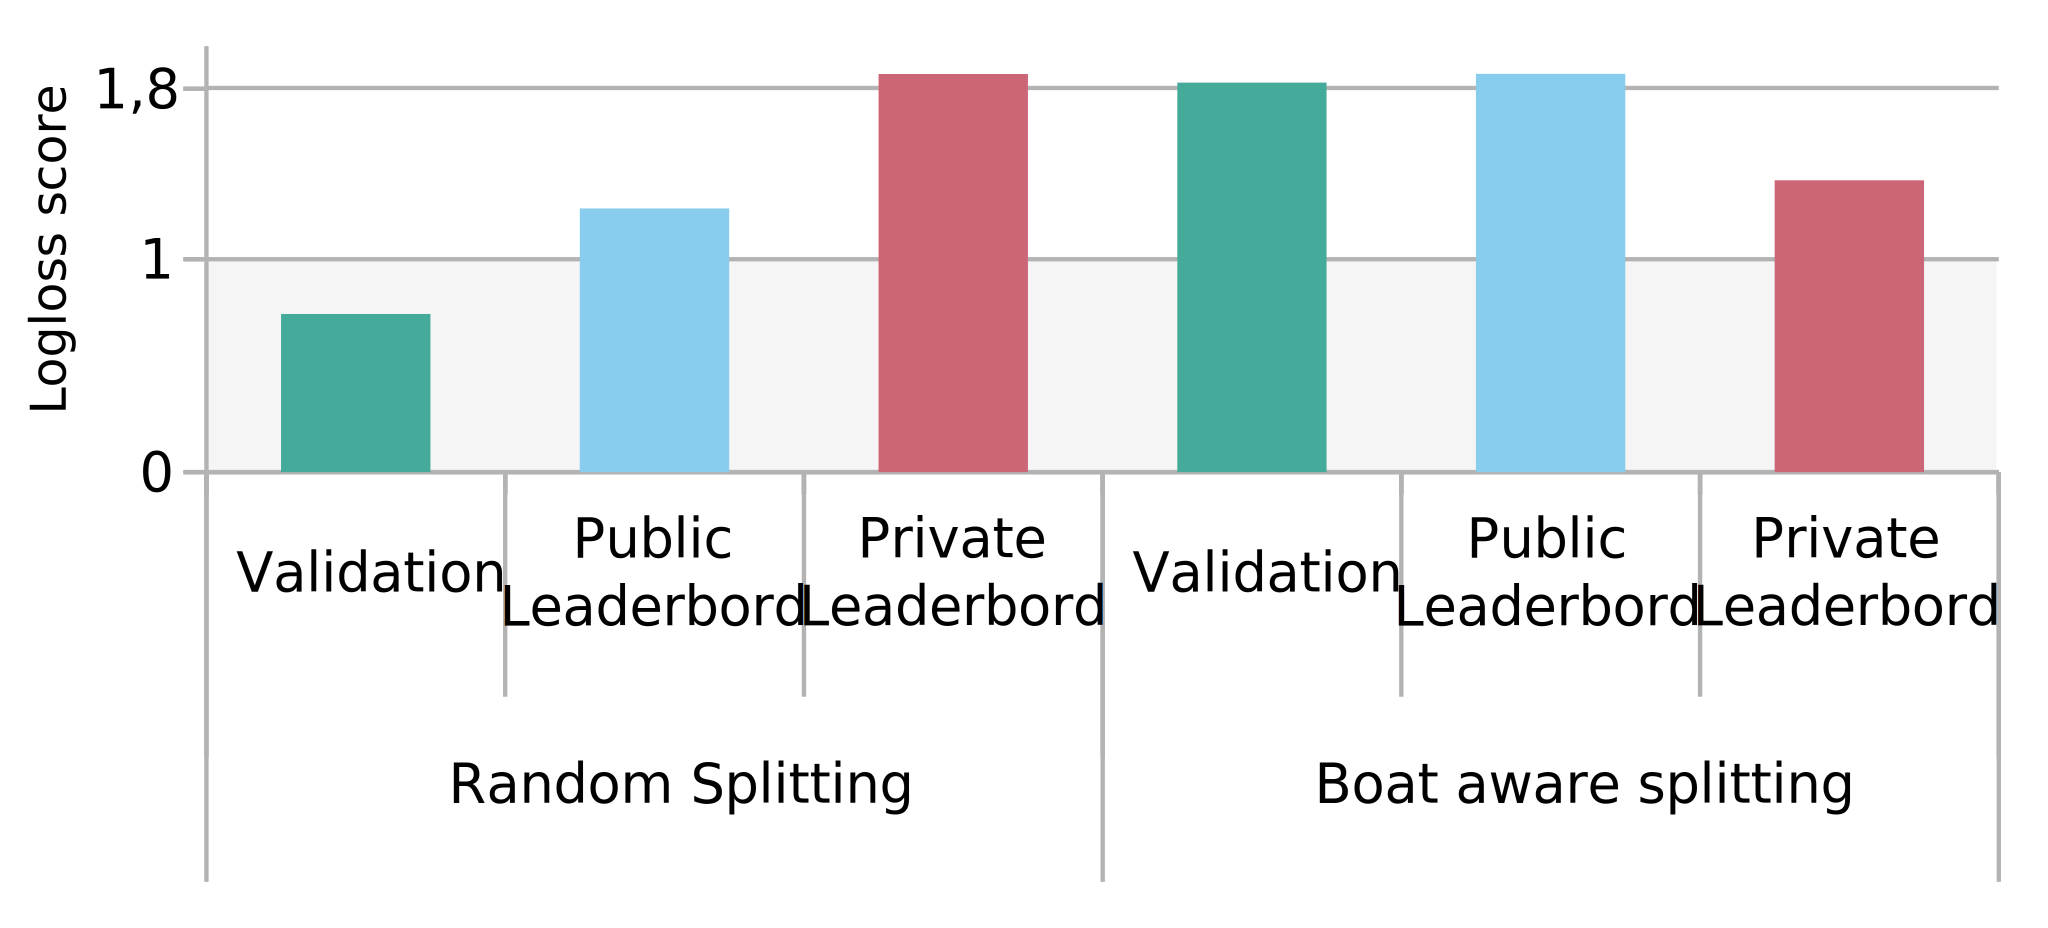

In [6]:
SVG(filename='images/scores_xgboost.svg')

Logloss score keep rising from validation dataset to the private one when we used random splitting, showing that it was a final poor choice as the private dataset contained many unseen boats so far. Training with a boat-aware splitting, allowed us to have a much more consistant results between the datasets. Even if the results in terms of rank on the leaderboard were not great with this approach, it showed us that this kind of model, even if less accurate than state-of-the-art classifier, they generalize well compared to many and gives consistant results.

# Strength of deep learning

We fine-tune several Convnet models, namely VGG16, VGG19, and GoogleNet (Inception) on both the original and augmented dataset. For each model, we truncate and replace the top layer (softmax layer with 1000 categories for ImageNet) with our new softmax layer with

# Conclusion & perspective

Questions:
* Fig score xgoboost, comment tu obtiens le score pour le private leader board pour le cas de boat aware splitting ?